In [1]:
import sys
sys.path.insert(1, '/home/afkirby/Analysis')

In [2]:
%matplotlib inline

In [3]:
import Geometry as geo
from getQuantity import getVel3D
from Flow import flowLine3D, isHorseshoe, findH
import numpy as np
from read_penguin import load_3D_data, cell_center
from matplotlib import pyplot as plt
from time import time
from Numerics import *

In [4]:
#Loading Data
xres3d = 288
yres3d = 480
zres3d = 144
data3d = load_3D_data("/scratch/afkirby/3DRsVariation/rs001/", xres3d, yres3d, zres3d, "h50_1p10E_e0_PPM4_ave", 10)

In [5]:
planetCoords = (1,np.pi,np.pi/2)
xp, yp, zp = geo.sphericalToCartesian(planetCoords, dim = 3)
planetVel = (0,1,0)

In [6]:
planetMass = 0.00003
h = 0.05
gamma = 1.4

error = 1e-8
maxstep = 0.01

In [7]:
def isoVel3D(x, y):
    coords = geo.cartesianToSpherical(y, dim = 3)
    v = getVel3D(coords, planetCoords, planetVel, data3d, cart = True)
    return v

In [8]:
rGrid = cell_center(data3d[1])
phiGrid = cell_center(data3d[2])
thetaGrid = cell_center(data3d[3])
coordX = np.linspace(-rGrid[-1] - xp, rGrid[-1] - xp, 1000)
coordY = np.linspace(-rGrid[-1] - yp, rGrid[-1] - yp, 1000)
coordZ = np.linspace(-np.cos(thetaGrid[0]) - zp, np.cos(thetaGrid[0]) - zp, 1000)

In [9]:
def starToPlanet(sCoords, planetCoords):
    sCoordsCart = geo.sphericalToCartesian(sCoords, dim = 3)
    pCoordsCart = np.array(sCoordsCart) - np.array(geo.sphericalToCartesian(planetCoords, dim = 3))
    return pCoordsCart
def velMag(r):
    phi = 2*np.pi/3
    theta = np.pi/2
    x,y,z = starToPlanet((r,phi,theta), planetCoords)
    vx,vy,vz = isoVel3D(0, (x,y,z))
    return np.sqrt(vx**2 + vy**2 + vz**2)

In [35]:
corot = NR(velMag, 1, 1e-3, 1e-10)
guess = 0.021
xi, yi, zi = starToPlanet((corot - guess, 2*np.pi/3, thetaGrid[-2]), planetCoords)
flow = flowLine3D(xi, yi, zi, coordX, coordY, coordZ, error, isoVel3D, maxstep)
xi, yi, zi = starToPlanet((1 + guess, 4*np.pi/3, np.pi/2), planetCoords)
flow2 = flowLine3D(xi, yi, zi, coordX, coordY, coordZ, error, isoVel3D, maxstep)

[ 5.14522899e-01  8.48464948e-01 -2.49410636e-08]
[ 2.05718830e+00 -4.29054398e-04 -3.53682472e-05]


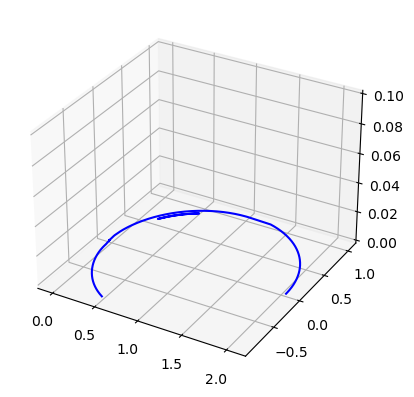

In [38]:
ax = plt.figure().add_subplot(projection = '3d')
plt.plot(flow[0], flow[1], flow[2], color = 'b')
plt.plot(flow2[0], flow2[1], flow2[2], color = 'b')
ax.set_zlim(0, 0.1)
#ax.set_xlim(-0.2, 0.2)
#ax.set_ylim(-0.2, 0.2)
plt.show()

In [37]:
print(isHorseshoe(flow, planetCoords))
print(isHorseshoe(flow2, planetCoords))
print(corot)

False
False
0.9969806020039222
